<a href="https://colab.research.google.com/github/NadiaAnwar121/Fashion-MNIST/blob/main/prodigy_task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.corpus import stopwords  # Install using: pip install wordcloud nltk


In [ ]:
# Load the dataset
file_path = '/content/drive/MyDrive/UK_Accident.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [ ]:
df.columns

Index(['Unnamed: 0', 'Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [ ]:
df.dtypes.value_counts()

object     15
int64      14
float64     4
dtype: int64

In [ ]:
df.shape

(1504150, 33)

In [ ]:
df.duplicated().sum()

0

In [ ]:
# Check for null values in the entire DataFrame
null_values = df.isnull().sum()

# Display the count of null values for each column
print("Null Values in Each Column:")
print(null_values)

Null Values in Each Column:
Unnamed: 0                                          0
Accident_Index                                      0
Location_Easting_OSGR                             101
Location_Northing_OSGR                              0
Longitude                                         101
Latitude                                            0
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                              117
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0


In [ ]:
import pandas as pd

# Assuming df is your DataFrame
exclude_columns = ['LSOA_of_Accident_Location']

# Drop the 'LSOA_of_Accident_Location' column
df = df.drop(columns=exclude_columns)

# Drop rows with null values for columns
df = df.dropna()

# Display the updated count of null values after handling
updated_null_values = df.isnull().sum()
print("Updated Null Values in Each Column:")
print(updated_null_values)


Updated Null Values in Each Column:
Unnamed: 0                                     0
Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Control                 

In [ ]:
# Convert 'Date' and 'Time' columns to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.time

In [ ]:
# Extract hour from the 'Time' column
df['Hour'] = df['Time'].apply(lambda x: x.hour if pd.notnull(x) else None)


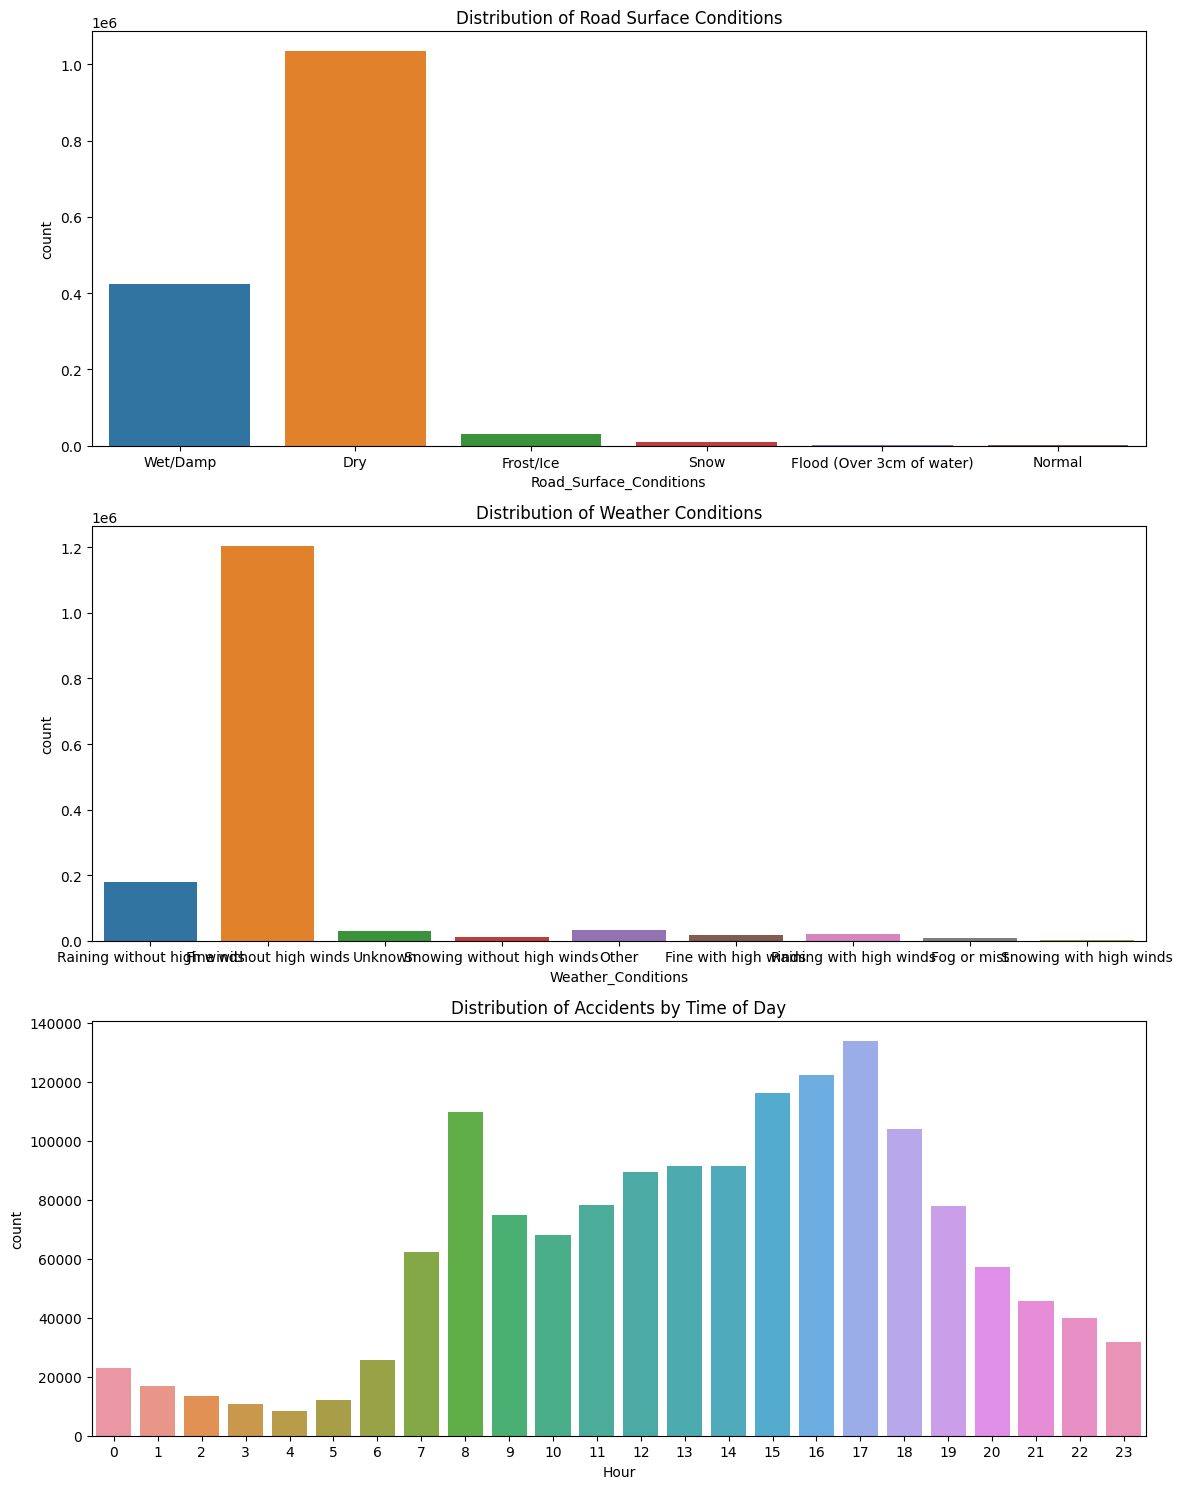

In [ ]:
# Analyze patterns related to road conditions, weather, and time of day
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Road Surface Conditions
sns.countplot(x='Road_Surface_Conditions', data=df, ax=axes[0])
axes[0].set_title('Distribution of Road Surface Conditions')

# Weather Conditions
sns.countplot(x='Weather_Conditions', data=df, ax=axes[1])
axes[1].set_title('Distribution of Weather Conditions')

# Time of Day
sns.countplot(x='Hour', data=df, ax=axes[2])
axes[2].set_title('Distribution of Accidents by Time of Day')

plt.tight_layout()
plt.show()

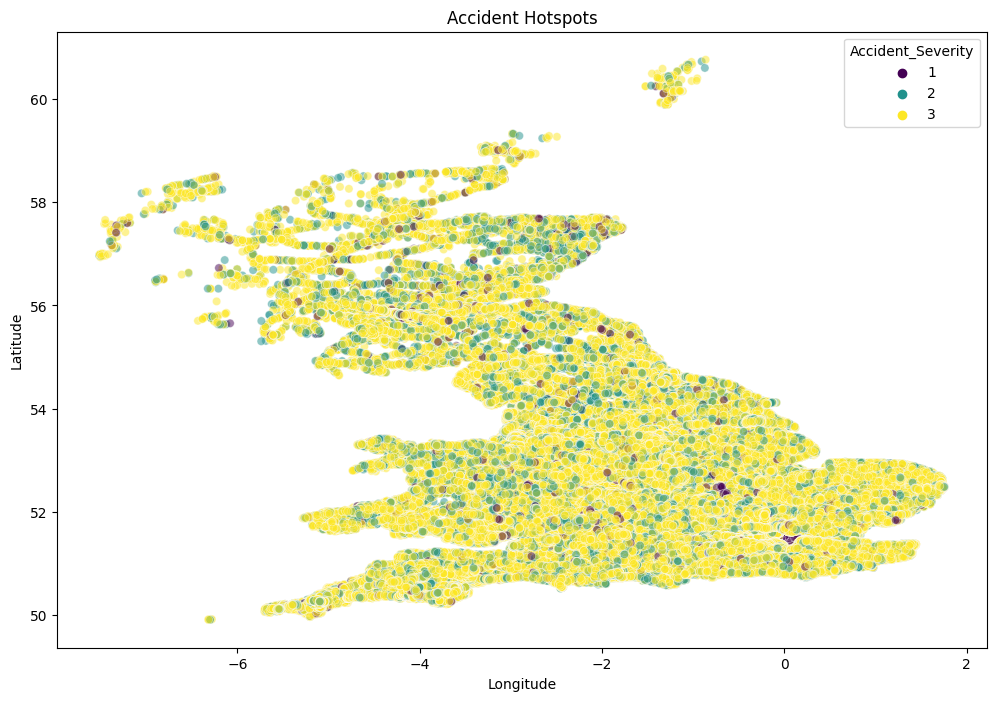

In [ ]:
# Visualize accident hotspots using Latitude and Longitude
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Longitude', y='Latitude', data=df, hue='Accident_Severity', palette='viridis', alpha=0.5)
plt.title('Accident Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

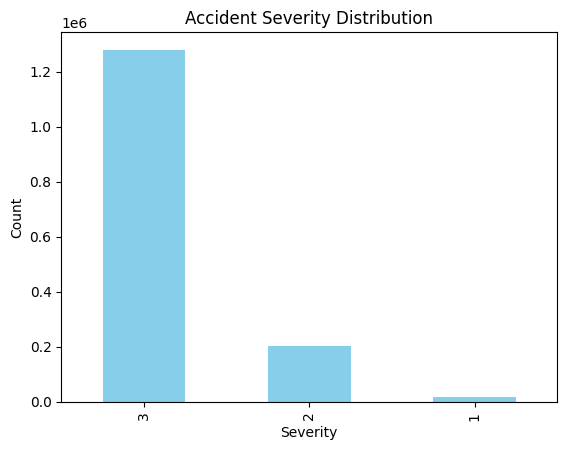

In [ ]:
# 1. Accident Severity Distribution
severity_distribution = df['Accident_Severity'].value_counts()
severity_distribution.plot(kind='bar', color='skyblue')
plt.title('Accident Severity Distribution')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

In [ ]:
# 2. Time Analysis
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month


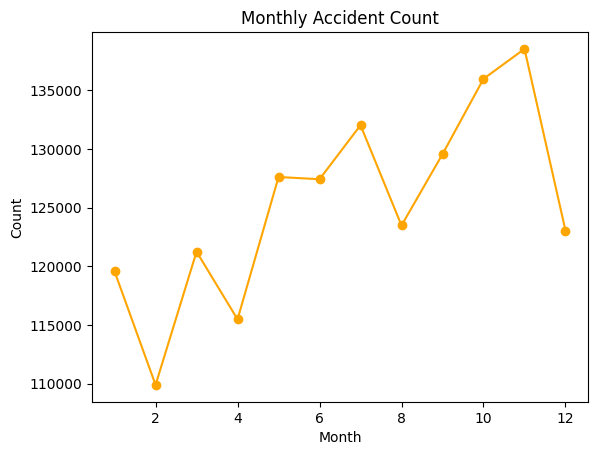

In [ ]:
# Monthly accident count
monthly_accidents = df.groupby('Month')['Accident_Index'].count()
monthly_accidents.plot(kind='line', marker='o', color='orange')
plt.title('Monthly Accident Count')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

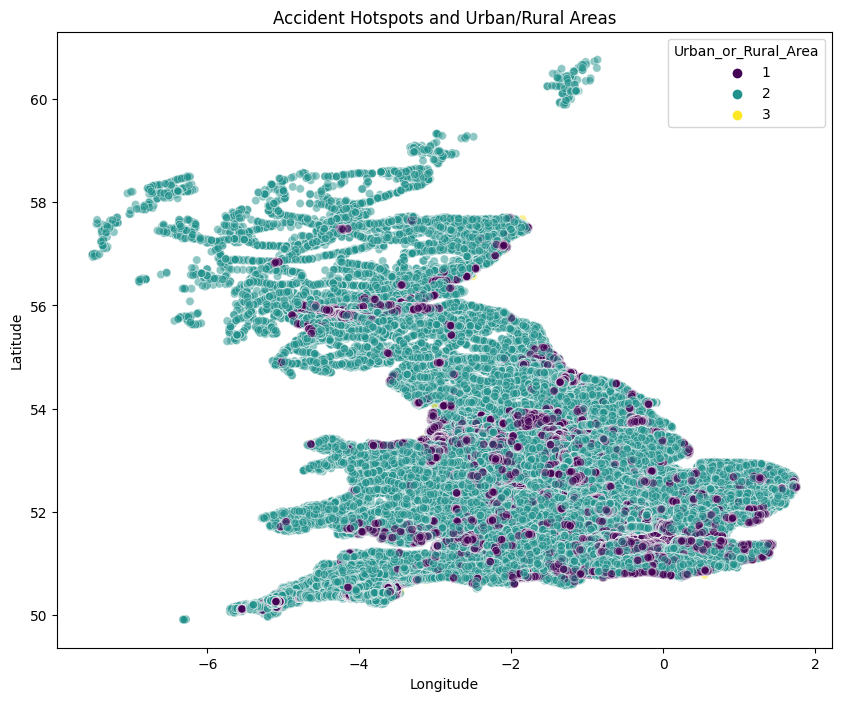

In [ ]:
# 3. Location Analysis
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='Urban_or_Rural_Area', data=df, palette='viridis', alpha=0.5)
plt.title('Accident Hotspots and Urban/Rural Areas')
plt.show()
